This notebook is to combine the properties and features historical 

In [136]:
import pandas as pd
properties_df = pd.read_csv('/home/eeamanda/project-2-group-real-estate-industry-project-7-2025/datasets/all_properties_tidy_enriched.csv')

/tmp/ipykernel_2071197/636035063.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  properties_df = pd.read_csv('/home/eeamanda/project-2-group-real-estate-industry-project-7-2025/datasets/all_properties_tidy_enriched.csv')


In [137]:
properties_df.head(8)

,Suburb,date,bedrooms,property_type,Count,Median,Lat,Lng,SA2_CODE21,SA2_NAME21,LGA_CODE21,LGA_NAME21
0,Albert Park-Middle Park-West St Kilda,1/03/2000,1.0,flat,352,165,-37.853484,144.9701609,206051128.0,Albert Park,25900.0,Port Phillip
1,Albert Park-Middle Park-West St Kilda,1/03/2000,2.0,flat,292,250,-37.853484,144.9701609,206051128.0,Albert Park,25900.0,Port Phillip
2,Albert Park-Middle Park-West St Kilda,1/03/2000,2.0,house,172,300,-37.853484,144.9701609,206051128.0,Albert Park,25900.0,Port Phillip
3,Albert Park-Middle Park-West St Kilda,1/03/2000,3.0,flat,25,350,-37.853484,144.9701609,206051128.0,Albert Park,25900.0,Port Phillip
4,Albert Park-Middle Park-West St Kilda,1/03/2000,3.0,house,115,390,-37.853484,144.9701609,206051128.0,Albert Park,25900.0,Port Phillip
5,Albert Park-Middle Park-West St Kilda,1/03/2000,4.0,house,19,500,-37.853484,144.9701609,206051128.0,Albert Park,25900.0,Port Phillip
6,Albert Park-Middle Park-West St Kilda,1/03/2000,NaN,NaN,1143,260,-37.853484,144.9701609,206051128.0,Albert Park,25900.0,Port Phillip
7,Albert Park-Middle Park-West St Kilda,1/06/2000,1.0,flat,347,165,-37.853484,144.9701609,206051128.0,Albert Park,25900.0,Port Phillip


# Cleaning property data

In [138]:
missing_both = properties_df[properties_df["SA2_CODE21"].isna() | properties_df["LGA_CODE21"].isna()]
missing_both

,Suburb,date,bedrooms,property_type,Count,Median,Lat,Lng,SA2_CODE21,SA2_NAME21,LGA_CODE21,LGA_NAME21
45120,Group Total,1/03/2000,1.0,flat,7746,160,NaN,NaN,NaN,NaN,NaN,NaN
45121,Group Total,1/03/2000,2.0,flat,9079,245,NaN,NaN,NaN,NaN,NaN,NaN
45122,Group Total,1/03/2000,2.0,house,2677,260,NaN,NaN,NaN,NaN,NaN,NaN
45123,Group Total,1/03/2000,3.0,flat,1448,370,NaN,NaN,NaN,NaN,NaN,NaN
45124,Group Total,1/03/2000,3.0,house,1816,320,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
91990,Wanagaratta,1/03/2025,2.0,house,23,390,NaN,NaN,NaN,NaN,NaN,NaN
91991,Wanagaratta,1/03/2025,3.0,flat,22,450,NaN,NaN,NaN,NaN,NaN,NaN
91992,Wanagaratta,1/03/2025,3.0,house,234,450,NaN,NaN,NaN,NaN,NaN,NaN
91993,Wanagaratta,1/03/2025,4.0,house,70,580,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
properties_df["SA2_CODE21"] = properties_df["SA2_CODE21"].astype("Int64")
properties_df["LGA_CODE21"] = properties_df["LGA_CODE21"].astype("Int64")


In [140]:
#Delete all "group total" rows, clean Wanagaratta SA2 code

# 1. Drop rows where Suburb == "Group Total"
properties_df = properties_df[properties_df["Suburb"] != "Group Total"].copy()

# 2. Update the Wanagaratta row
mask = properties_df["Suburb"] == "Wanagaratta"
properties_df.loc[mask, "SA2_CODE21"] = 204021066
properties_df.loc[mask, "SA2_NAME21"] = "Wangaratta"
properties_df.loc[mask, "Lat"] = -36.3588908
properties_df.loc[mask, "Lng"] = 146.3096576



In [141]:
#Delete all LGA related
properties_df = properties_df.drop(columns=["LGA_CODE21", "LGA_NAME21"])

Taking only the total of the properties, nan bedrooms and property type

In [142]:
properties_df = properties_df[
    properties_df["bedrooms"].isna() & properties_df["property_type"].isna()
]


In [143]:
properties_df = properties_df.drop(columns=["bedrooms", "property_type","Count"])
properties_df

,Suburb,date,Median,Lat,Lng,SA2_CODE21,SA2_NAME21
6,Albert Park-Middle Park-West St Kilda,1/03/2000,260,-37.853484,144.9701609,206051128,Albert Park
13,Albert Park-Middle Park-West St Kilda,1/06/2000,260,-37.853484,144.9701609,206051128,Albert Park
20,Albert Park-Middle Park-West St Kilda,1/09/2000,270,-37.853484,144.9701609,206051128,Albert Park
27,Albert Park-Middle Park-West St Kilda,1/12/2000,275,-37.853484,144.9701609,206051128,Albert Park
34,Albert Park-Middle Park-West St Kilda,1/03/2001,275,-37.853484,144.9701609,206051128,Albert Park
...,...,...,...,...,...,...,...
100146,Yarraville-Seddon,1/03/2024,570,-37.812809,144.884163,213031352,Yarraville
100153,Yarraville-Seddon,1/06/2024,590,-37.812809,144.884163,213031352,Yarraville
100160,Yarraville-Seddon,1/09/2024,595,-37.812809,144.884163,213031352,Yarraville
100167,Yarraville-Seddon,1/12/2024,600,-37.812809,144.884163,213031352,Yarraville


In [144]:
properties_df["date"] = pd.to_datetime(
    properties_df["date"],
    format="%d/%m/%Y"   # day/month/year
)

In [145]:
# Define your year range
start_date = pd.Timestamp("2017-01-01")
end_date   = pd.Timestamp("2025-12-31")

# Filter only properties within 2017–2025
properties_df = properties_df[(properties_df["date"] >= start_date) & (properties_df["date"] <= end_date)]
properties_df

,Suburb,date,Median,Lat,Lng,SA2_CODE21,SA2_NAME21
482,Albert Park-Middle Park-West St Kilda,2017-03-01,520,-37.853484,144.9701609,206051128,Albert Park
489,Albert Park-Middle Park-West St Kilda,2017-06-01,532,-37.853484,144.9701609,206051128,Albert Park
496,Albert Park-Middle Park-West St Kilda,2017-09-01,530,-37.853484,144.9701609,206051128,Albert Park
503,Albert Park-Middle Park-West St Kilda,2017-12-01,530,-37.853484,144.9701609,206051128,Albert Park
510,Albert Park-Middle Park-West St Kilda,2018-03-01,550,-37.853484,144.9701609,206051128,Albert Park
...,...,...,...,...,...,...,...
100146,Yarraville-Seddon,2024-03-01,570,-37.812809,144.884163,213031352,Yarraville
100153,Yarraville-Seddon,2024-06-01,590,-37.812809,144.884163,213031352,Yarraville
100160,Yarraville-Seddon,2024-09-01,595,-37.812809,144.884163,213031352,Yarraville
100167,Yarraville-Seddon,2024-12-01,600,-37.812809,144.884163,213031352,Yarraville


In [146]:
properties_df.to_csv("properties_df.csv", index=False)

# Linear regression, using only median rent

Train and evaluate

In [147]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# 1️⃣ Prepare data again (clean + time index)

properties_df['date'] = pd.to_datetime(properties_df['date'])
properties_df = properties_df.sort_values(['Suburb', 'date'])

t0 = properties_df['date'].min()
properties_df['t'] = ((properties_df['date'] - t0) / pd.Timedelta(days=90)).astype(int)

# --- 1. prepare data ---
test_mask = properties_df['date'].isin([
    pd.Timestamp('2024-12-01'),
    pd.Timestamp('2025-03-01')
])
train_mask = ~test_mask

train_df = properties_df.loc[train_mask].copy()
test_df  = properties_df.loc[test_mask].copy()

results, pred_rows = [], []

# --- fit and evaluate per suburb ---
for suburb, df_train in train_df.groupby('Suburb'):
    df_train = df_train.sort_values('t')
    X_train = df_train[['t']]
    y_train = df_train['Median']

    df_test = test_df.loc[test_df['Suburb'] == suburb].sort_values('t')
    if df_test.empty:
        continue

    X_test = df_test[['t']]
    y_test = df_test['Median']

    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred) if len(y_test) >= 2 else np.nan

    results.append({
        'Suburb': suburb,
        'MAE_test': mae,
        'R2_test': r2,
        'n_train': len(X_train),
        'n_test': len(X_test)
    })

    pred_rows.append(pd.DataFrame({
        'Suburb': suburb,
        'date': df_test['date'].values,
        't': df_test['t'].values,
        'Actual': y_test.values,
        'Predicted': y_pred
    }))

results_df = pd.DataFrame(results).sort_values('MAE_test')
test_preds_df = pd.concat(pred_rows, ignore_index=True) if pred_rows else pd.DataFrame()

# --- summary metrics ---
if not test_preds_df.empty:
    overall_mae = mean_absolute_error(test_preds_df['Actual'], test_preds_df['Predicted'])
    overall_r2 = r2_score(test_preds_df['Actual'], test_preds_df['Predicted']) if len(test_preds_df) >= 2 else np.nan
    print(f"Overall MAE (Dec 2024 & Mar 2025): {overall_mae:.3f} | R²: {overall_r2}")
else:
    print("No test data for those quarters.")

print(results_df.head(10))




/tmp/ipykernel_2071197/455467117.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties_df['date'] = pd.to_datetime(properties_df['date'])


Overall MAE (Dec 2024 & Mar 2025): 54.567 | R²: 0.5286665323563443
                   Suburb  MAE_test   R2_test  n_train  n_test
66               Hamilton  0.928629  0.847351       31       2
5                Ballarat  2.013105  0.000000       31       2
115               Seymour  2.919758  0.000000       31       2
114  Sebastopol-Delacombe  3.070565  0.000000       31       2
130               Torquay  4.160887  0.000000       31       2
9                 Benalla  4.216331  0.637140       31       2
72                Horsham  4.315323  0.000000       31       2
62       Geelong-Newcombe  4.352823  0.000000       31       2
112           Sale-Maffra  4.476411  0.000000       31       2
137   Wendouree-Alfredton  4.968145  0.000000       31       2


Retrain all and then predict future growth

In [148]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# 2️⃣ Fit through March 2025 and forecast to 2030
forecast_quarters = pd.date_range('2025-06-01', '2030-12-01', freq='3MS')
future_results = []

for suburb, df_sub in properties_df.groupby('Suburb'):
    df_sub = df_sub.sort_values('t')
    
    # train on all data up to and including Mar 2025
    train_df = df_sub[df_sub['date'] <= '2025-03-01']
    if train_df.empty:
        continue
    
    X_train = train_df[['t']]
    y_train = train_df['Median']

    model = LinearRegression().fit(X_train, y_train)
    
    # prepare future t values
    last_t = train_df['t'].max()
    future_t = np.arange(last_t + 1, last_t + 1 + len(forecast_quarters))
    future_X = pd.DataFrame({'t': future_t})
    
    # forecast
    y_pred = model.predict(future_X)

    preds = pd.DataFrame({
        'Suburb': suburb,
        'date': forecast_quarters,
        'Predicted_Median': y_pred
    })
    future_results.append(preds)

forecast_df = pd.concat(future_results, ignore_index=True)
forecast_df.head()


,Suburb,date,Predicted_Median
0,Albert Park-Middle Park-West St Kilda,2025-06-01,621.007576
1,Albert Park-Middle Park-West St Kilda,2025-09-01,624.230838
2,Albert Park-Middle Park-West St Kilda,2025-12-01,627.454100
3,Albert Park-Middle Park-West St Kilda,2026-03-01,630.677362
4,Albert Park-Middle Park-West St Kilda,2026-06-01,633.900624


Calculate the growth by using the difference

In [149]:
import pandas as pd
import numpy as np

# Ensure datetime
forecast_df = forecast_df.copy()
forecast_df['date'] = pd.to_datetime(forecast_df['date'])

# Define window
start_date = pd.Timestamp('2025-03-01')
end_date   = pd.Timestamp('2030-12-01')

# Pull start/end rows
start_vals = (properties_df.loc[properties_df['date'] == start_date, ['Suburb','Median']]
              .rename(columns={'Median':'Start'}))
end_vals   = (forecast_df.loc[forecast_df['date'] == end_date,   ['Suburb','Predicted_Median']]
              .rename(columns={'Predicted_Median':'End'}))

# Join and compute growth
growth_df = start_vals.merge(end_vals, on='Suburb', how='inner')
growth_df['Pct_Growth_%'] = (growth_df['End'] - growth_df['Start']) / growth_df['Start'] * 100

# CAGR over exact years between the two dates
years = (end_date.year + end_date.month/12) - (start_date.year + start_date.month/12)
growth_df['CAGR_%'] = ((growth_df['End'] / growth_df['Start'])**(1/years) - 1) * 100

# Sort by growth
growth_df = growth_df.sort_values('Pct_Growth_%', ascending=False).reset_index(drop=True)
print(growth_df.head(10))


                     Suburb  Start         End  Pct_Growth_%    CAGR_%
0                  Portland    400  569.177250     42.294313  6.326449
1  Ocean Grove-Barwon Heads    550  739.029078     34.368923  5.271992
2      Sebastopol-Delacombe    430  575.592135     33.858636  5.202355
3                   Morwell    360  481.537433     33.760398  5.188923
4               Wanagaratta    411  549.651070     33.735053  5.185457
5               Sale-Maffra    440  586.796791     33.362907  5.134494
6                   Benalla    440  586.018717     33.186072  5.110236
7            Moe-Newborough    360  474.163213     31.712004  4.906986
8             North Bendigo    460  596.027295     29.571151  4.608425
9                   Seymour    400  515.582331     28.895583  4.513365


# Combining with external features

Start with population

In [150]:
population_df = pd.read_csv('/home/eeamanda/project-2-group-real-estate-industry-project-7-2025/Amanda-workspace/full_erp_only_population_data.csv')
population_df


,sa2_code,erp_2015,erp_2016,erp_2017,erp_2018,erp_2019,erp_2020,erp_2021,erp_2022,erp_2023,...,erp_2027,erp_2028,erp_2029,erp_2030,erp_2031,erp_2032,erp_2033,erp_2034,erp_2035,erp_2036
0,201011001,11039.0,11852.0,12649.0,13537.0,14434.0,15507.0,16841.0,18002.0,18995.0,...,21325.893697,21895.531232,22465.168766,23034.806301,23604.443836,24095.619230,24586.794624,25077.970018,25569.145413,26060.320807
1,201011002,12300.0,12301.0,12266.0,12244.0,12320.0,12196.0,12071.0,11938.0,11811.0,...,11719.320995,11740.348397,11761.375799,11782.403201,11803.430603,11839.942960,11876.455316,11912.967673,11949.480030,11985.992387
2,201011005,7191.0,7311.0,7409.0,7418.0,7458.0,7377.0,7229.0,7247.0,7323.0,...,7434.686493,7497.293213,7559.899932,7622.506652,7685.113372,7753.868146,7822.622920,7891.377695,7960.132469,8028.887243
3,201011006,6846.0,7195.0,7622.0,8183.0,8890.0,9755.0,10648.0,11798.0,12865.0,...,16827.266327,17739.346612,18651.426898,19563.507183,20475.587469,21373.510463,22271.433457,23169.356451,24067.279445,24965.202439
4,201011007,3966.0,3990.0,4004.0,4042.0,4112.0,4152.0,4211.0,4223.0,4267.0,...,4341.161505,4370.224481,4399.287456,4428.350431,4457.413406,4511.024293,4564.635179,4618.246065,4671.856951,4725.467837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,217031476,3538.0,3556.0,3635.0,3710.0,3802.0,3911.0,3979.0,3974.0,3983.0,...,4147.083280,4182.682086,4218.280891,4253.879696,4289.478501,4325.233368,4360.988235,4396.743101,4432.497968,4468.252835
526,217041477,6716.0,6709.0,6717.0,6746.0,6798.0,6883.0,6990.0,7046.0,7131.0,...,7221.447801,7256.180692,7290.913584,7325.646476,7360.379368,7392.136323,7423.893278,7455.650233,7487.407188,7519.164143
527,217041478,9467.0,9603.0,9686.0,9783.0,9845.0,9859.0,9967.0,10098.0,10147.0,...,10495.508296,10585.734805,10675.961314,10766.187824,10856.414333,10941.352640,11026.290947,11111.229254,11196.167562,11281.105869
528,217041479,21217.0,21442.0,21688.0,21954.0,22184.0,22416.0,22470.0,22586.0,22761.0,...,23444.843119,23635.499809,23826.156499,24016.813189,24207.469878,24402.183550,24596.897222,24791.610894,24986.324566,25181.038238


In [151]:
import pandas as pd
import re

# ---------- INPUTS ----------
# properties_df with columns ['date','SA2_CODE21', ...]
# population_df with ['sa2_code','erp_2015'..] (wide)


# ---------- 1) Keep ONLY erp_2015..erp_2025 ----------
years = range(2017, 2026)
keep_cols = ["sa2_code"] + [f"erp_{y}" for y in years if f"erp_{y}" in population_df.columns]
pop_wide = population_df[keep_cols].copy()

# one row per SA2
if pop_wide.duplicated("sa2_code").any():
    pop_wide = (pop_wide.groupby("sa2_code", as_index=False)
                .agg({c: "mean" for c in pop_wide.columns if c != "sa2_code"}))

# ---------- 2) Wide -> long (dup-safe) ----------
pop_long = pop_wide.melt(id_vars="sa2_code", var_name="year_lbl", value_name="ERP")
pop_long["year"] = pop_long["year_lbl"].str[-4:].astype(int)
pop_long = (pop_long.groupby(["sa2_code","year"], as_index=False)
                    .agg(ERP=("ERP","mean")))
pop_long["date"] = pd.to_datetime(pop_long["year"].astype(str) + "-01-01")

# ---------- 3) Build ERP quarterly grid STRICTLY within 2015–2025, on the 3rd ----------
q_start = pd.Timestamp("2017-03-01")
q_end   = pd.Timestamp("2025-03-01")
quarterly_index = pd.date_range(start=q_start, end=q_end, freq="QS-MAR")  # 03-Mar, 03-Jun, 03-Sep, 03-Dec

# ---------- 4) Interpolate to quarterly (no extension outside window) ----------
out = []
for code, g in pop_long.groupby("sa2_code"):
    g = (g[["date", "ERP"]]
         .sort_values("date")
         .set_index("date"))
    g = g[~g.index.duplicated(keep="last")]

    # Interpolate on union, then keep only the 3rd-of-quarter dates
    union_idx = g.index.union(quarterly_index)
    g_u = g.reindex(union_idx)
    g_u["ERP"] = g_u["ERP"].interpolate(method="time") #method="time" because it is linear with time - good for population

    # Keep quarterly rows and make columns tidy
    g_q = (g_u.reindex(quarterly_index)
               .rename(columns={"ERP": "ERP_quarterly"})
               .reset_index()                      # now a RangeIndex
               .rename(columns={"index": "date"}))

    # IMPORTANT: assign SA2 after reset_index so it doesn’t align by the old DateTimeIndex
    g_q["SA2_CODE21"] = code  # scalar broadcast; simple and safe
    g_q["SA2_CODE21"] = g_q["SA2_CODE21"].astype("Int64")

    out.append(g_q)

pop_quarterly = pd.concat(out, ignore_index=True)

# ---------- 5) Snap property dates to the 3rd and MERGE ----------
#properties_df["date"] = properties_df["date"].dt.to_period("Q-MAR").dt.start_time 
merged_df = properties_df.merge(pop_quarterly, how="left", on=["SA2_CODE21","date"])

# Optional: drop property rows outside ERP window so you never see 2000 again
#merged = merged[(merged["date"] >= q_start) & (merged["date"] <= q_end)]


In [152]:
merged_df

,Suburb,date,Median,Lat,Lng,SA2_CODE21,SA2_NAME21,t,ERP_quarterly
0,Albert Park-Middle Park-West St Kilda,2017-03-01,520,-37.853484,144.9701609,206051128,Albert Park,0,16536.854795
1,Albert Park-Middle Park-West St Kilda,2017-06-01,532,-37.853484,144.9701609,206051128,Albert Park,1,16594.323288
2,Albert Park-Middle Park-West St Kilda,2017-09-01,530,-37.853484,144.9701609,206051128,Albert Park,2,16651.791781
3,Albert Park-Middle Park-West St Kilda,2017-12-01,530,-37.853484,144.9701609,206051128,Albert Park,3,16708.635616
4,Albert Park-Middle Park-West St Kilda,2018-03-01,550,-37.853484,144.9701609,206051128,Albert Park,4,16785.060274
...,...,...,...,...,...,...,...,...,...
4813,Yarraville-Seddon,2024-03-01,570,-37.812809,144.884163,213031352,Yarraville,28,16280.121038
4814,Yarraville-Seddon,2024-06-01,590,-37.812809,144.884163,213031352,Yarraville,29,16337.039963
4815,Yarraville-Seddon,2024-09-01,595,-37.812809,144.884163,213031352,Yarraville,30,16393.958888
4816,Yarraville-Seddon,2024-12-01,600,-37.812809,144.884163,213031352,Yarraville,31,16450.259129


Continue with income

In [153]:
income_df = pd.read_csv("/home/eeamanda/project-2-group-real-estate-industry-project-7-2025/Amanda-workspace/income_predictions_2017_final.csv")
income_df = income_df.drop(income_df.index[0]).reset_index(drop=True) #First row is victoria we dont need it
income_df = income_df.rename(columns={"SA2": "sa2_code"})

In [154]:
income_df

,sa2_code,SA2 NAME,2017-18.sum,2018-19.sum,2019-20.sum,2020-21.sum,2021-22.sum,2017.med,2018.med,2019.med,...,2021-22.mean,med_CAGR,Predicted_Income_2023,Predicted_Income_2024,Predicted_Income_2025,Predicted_Income_2026,Predicted_Income_2027,Predicted_Income_2028,Predicted_Income_2029,Predicted_Income_2030
0,201011001,Alfredton,483036463.0,526674675.0,587104678.0,671910899.0,766120245.0,49982,50151,51620,...,69685,3.132328,58944.600000,60626.628571,62308.657143,63990.685714,65672.714286,67354.742857,69036.771429,70718.800000
1,201011002,Ballarat,583676689.0,614019577.0,622719767.0,658757843.0,683888799.0,48152,48937,51187,...,82715,2.924842,56348.600000,57777.057143,59205.514286,60633.971429,62062.428571,63490.885714,64919.342857,66347.800000
2,201011005,Buninyong,267515723.0,279770315.0,288252226.0,302723074.0,325191920.0,50469,48461,49846,...,68664,1.836983,55824.000000,57031.571429,58239.142857,59446.714286,60654.285714,61861.857143,63069.428571,64277.000000
3,201011006,Delacombe,230736055.0,265359118.0,303858080.0,347767491.0,421457036.0,46355,45598,47940,...,59595,2.866193,54359.733333,55884.704762,57409.676190,58934.647619,60459.619048,61984.590476,63509.561905,65034.533333
4,201011007,Smythes Creek,145342967.0,159605715.0,162558698.0,174786090.0,183108810.0,48415,48000,50938,...,64520,2.740581,57691.866667,59380.638095,61069.409524,62758.180952,64446.952381,66135.723810,67824.495238,69513.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,217031476,Otway,108079271.0,115082194.0,121471267.0,135387035.0,141211176.0,32085,30663,32420,...,54543,5.020252,41767.466667,43770.123810,45772.780952,47775.438095,49778.095238,51780.752381,53783.409524,55786.066667
518,217041477,Moyne - East,207102941.0,235911309.0,248715753.0,259197028.0,285466499.0,38224,40764,43158,...,61049,5.457629,51755.733333,54008.704762,56261.676190,58514.647619,60767.619048,63020.590476,65273.561905,67526.533333
519,217041478,Moyne - West,311159848.0,336313641.0,359222336.0,384277688.0,430826553.0,41581,41093,43243,...,64874,4.403630,52606.933333,54729.104762,56851.276190,58973.447619,61095.619048,63217.790476,65339.961905,67462.133333
520,217041479,Warrnambool - North,797046929.0,759894035.0,804199635.0,854591829.0,915937309.0,42537,43939,45632,...,60799,4.017371,53695.066667,55613.466667,57531.866667,59450.266667,61368.666667,63287.066667,65205.466667,67123.866667


Interpolate quarterly for both ERP and income

In [155]:
import pandas as pd
import re


# ---------- 1) Collect the columns we need ----------
# 2017–2022 medians
median_cols = [c for c in income_df.columns if re.fullmatch(r"\d{4}\.med", c)]
# keep only 2017..2022
median_cols = [c for c in median_cols if 2017 <= int(c[:4]) <= 2022]
median_cols = sorted(median_cols)  # e.g. ['2017.med', ..., '2022.med']

# predicted 2023–2024
pred_cols = [c for c in income_df.columns if re.fullmatch(r"Predicted_Income_\d{4}", c)]
pred_cols = [c for c in pred_cols if 2023 <= int(c.split("_")[-1]) <= 2024]
pred_cols = sorted(pred_cols)  # e.g. ['Predicted_Income_2023','Predicted_Income_2024']

keep_cols = ["sa2_code"] + median_cols + pred_cols
income_keep = income_df[keep_cols].drop_duplicates(subset=["sa2_code"])

# ---------- 2) Rename to a unified scheme: income_YYYY ----------
rename_map = {c: f"income_{c[:4]}" for c in median_cols}  # '2017.med' -> 'income_2017'
rename_map.update({c: f"income_{c.split('_')[-1]}" for c in pred_cols})  # 'Predicted_Income_2023' -> 'income_2023'
income_keep = income_keep.rename(columns=rename_map)

# ---------- 3) Wide -> long (sa2_code, year, income) ----------
value_cols = [c for c in income_keep.columns if c.startswith("income_")]
inc_long = income_keep.melt(id_vars="sa2_code", value_vars=value_cols,
                            var_name="year_lbl", value_name="income_annual")
inc_long["year"] = inc_long["year_lbl"].str.extract(r"(\d{4})").astype(int)
inc_long = inc_long.drop(columns="year_lbl")

# Restrict to 2017..2024 as requested
inc_long = inc_long[inc_long["year"].between(2017, 2024)]

# If any duplicates remain per (sa2_code, year), collapse safely
inc_long = (inc_long
            .groupby(["sa2_code","year"], as_index=False)
            .agg(income_annual=("income_annual","mean")))

# Create annual datetime anchor (Jan 1)
inc_long["date"] = pd.to_datetime(inc_long["year"].astype(str) + "-01-01")

# ---------- 4) Interpolate to the EXACT dates that exist in merged_df ----------
# Build the target quarterly index directly from merged_df
target_dates = pd.to_datetime(pd.Index(sorted(merged_df["date"].unique()))).tz_localize(None)

inc_q_list = []
for code, g in inc_long.groupby("sa2_code"):
    g = (g[["date","income_annual"]]
         .sort_values("date")
         .set_index("date"))
    g = g[~g.index.duplicated(keep="last")]

    # Interpolate on the union of annual points + target dates
    union_idx = g.index.union(target_dates)
    g_u = g.reindex(union_idx)
    # linear in actual time (best for calendar data)
    g_u["income"] = g_u["income_annual"].interpolate(method="time")
    g_q = g_u.reindex(target_dates)[["income"]]

    g_q = g_q.reset_index().rename(columns={"index":"date"})
    g_q["SA2_CODE21"] = pd.Series([code]*len(g_q), dtype="Int64")
    inc_q_list.append(g_q)

income_quarterly = pd.concat(inc_q_list, ignore_index=True)

# ---------- 5) Merge into merged_df ----------
income_quarterly["date"] = pd.to_datetime(income_quarterly["date"]).dt.normalize()
merged_df = merged_df.merge(income_quarterly, how="left", on=["SA2_CODE21","date"])

# Optional: rename for clarity
merged_df = merged_df.rename(columns={"income": "Income_quarterly_med"})


In [156]:
merged_df

,Suburb,date,Median,Lat,Lng,SA2_CODE21,SA2_NAME21,t,ERP_quarterly,Income_quarterly_med
0,Albert Park-Middle Park-West St Kilda,2017-03-01,520,-37.853484,144.9701609,206051128,Albert Park,0,16536.854795,62618.808219
1,Albert Park-Middle Park-West St Kilda,2017-06-01,532,-37.853484,144.9701609,206051128,Albert Park,1,16594.323288,62804.068493
2,Albert Park-Middle Park-West St Kilda,2017-09-01,530,-37.853484,144.9701609,206051128,Albert Park,2,16651.791781,62989.328767
3,Albert Park-Middle Park-West St Kilda,2017-12-01,530,-37.853484,144.9701609,206051128,Albert Park,3,16708.635616,63172.575342
4,Albert Park-Middle Park-West St Kilda,2018-03-01,550,-37.853484,144.9701609,206051128,Albert Park,4,16785.060274,63400.523288
...,...,...,...,...,...,...,...,...,...,...
4813,Yarraville-Seddon,2024-03-01,570,-37.812809,144.884163,213031352,Yarraville,28,16280.121038,84590.600000
4814,Yarraville-Seddon,2024-06-01,590,-37.812809,144.884163,213031352,Yarraville,29,16337.039963,84590.600000
4815,Yarraville-Seddon,2024-09-01,595,-37.812809,144.884163,213031352,Yarraville,30,16393.958888,84590.600000
4816,Yarraville-Seddon,2024-12-01,600,-37.812809,144.884163,213031352,Yarraville,31,16450.259129,84590.600000


# Linear reg with income and population

Train and evaluate

In [157]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# --- 1️⃣ Prepare data ---
df = merged_df.copy(deep=True)
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['Suburb', 'date'])

# numeric quarter index
t0 = df['date'].min()
df['t'] = ((df['date'] - t0) / pd.Timedelta(days=90)).astype(int)

# --- 2️⃣ Define train/test split ---
train_mask = df['date'] <= pd.Timestamp('2024-09-01')
test_mask  = df['date'].isin([pd.Timestamp('2024-12-01'), pd.Timestamp('2025-03-01')])

train_df = df.loc[train_mask].copy()
test_df  = df.loc[test_mask].copy()

results, test_rows, train_rows = [], [], []

# --- 3️⃣ Fit & evaluate per suburb ---
for suburb, df_train in train_df.groupby('Suburb'):
    df_train = df_train.sort_values('t')
    X_train = df_train[['t', 'ERP_quarterly', 'Income_quarterly_med']]
    y_train = df_train['Median']

    # skip suburbs with <2 train points (R² undefined)
    if len(X_train) < 2:
        continue

    # test slice for this suburb
    df_test = test_df.loc[test_df['Suburb'] == suburb].sort_values('t')
    X_test = df_test[['t', 'ERP_quarterly', 'Income_quarterly_med']] if not df_test.empty else None
    y_test = df_test['Median'] if not df_test.empty else None

    # fit
    model = LinearRegression().fit(X_train, y_train)

    # --- Train predictions & metrics ---
    y_pred_train = model.predict(X_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train  = r2_score(y_train, y_pred_train) if len(y_train) >= 2 else np.nan

    train_rows.append(pd.DataFrame({
        'Suburb': suburb,
        'date': df_train['date'].values,
        't': df_train['t'].values,
        'Actual': y_train.values,
        'Predicted': y_pred_train
    }))

    # --- Test predictions & metrics (if test rows exist) ---
    if X_test is not None and len(X_test) > 0:
        y_pred_test = model.predict(X_test)
        mae_test = mean_absolute_error(y_test, y_pred_test)
        r2_test  = r2_score(y_test, y_pred_test) if len(y_test) >= 2 else np.nan

        test_rows.append(pd.DataFrame({
            'Suburb': suburb,
            'date': df_test['date'].values,
            't': df_test['t'].values,
            'Actual': y_test.values,
            'Predicted': y_pred_test
        }))
    else:
        mae_test, r2_test = np.nan, np.nan

    results.append({
        'Suburb': suburb,
        'MAE_train': mae_train,
        'R2_train': r2_train,
        'MAE_test': mae_test,
        'R2_test': r2_test,
        'n_train': len(X_train),
        'n_test': 0 if X_test is None else len(X_test)
    })

# --- 4️⃣ Collate & overall metrics ---
results_df    = pd.DataFrame(results).sort_values(['MAE_test','MAE_train'], na_position='last')
train_preds_df = pd.concat(train_rows, ignore_index=True) if train_rows else pd.DataFrame()
test_preds_df  = pd.concat(test_rows,  ignore_index=True) if test_rows  else pd.DataFrame()

# Overall TRAIN metrics
if not train_preds_df.empty:
    overall_train_mae = mean_absolute_error(train_preds_df['Actual'], train_preds_df['Predicted'])
    overall_train_r2  = (r2_score(train_preds_df['Actual'], train_preds_df['Predicted'])
                         if train_preds_df['Suburb'].nunique() > 0 else np.nan)
    print(f"Overall TRAIN  MAE: {overall_train_mae:.3f} | R²: {overall_train_r2:.3f}")

# Overall TEST metrics
if not test_preds_df.empty:
    overall_test_mae = mean_absolute_error(test_preds_df['Actual'], test_preds_df['Predicted'])
    overall_test_r2  = (r2_score(test_preds_df['Actual'], test_preds_df['Predicted'])
                        if test_preds_df['Suburb'].nunique() > 0 else np.nan)
    print(f"Overall TEST   MAE: {overall_test_mae:.3f} | R²: {overall_test_r2:.3f}")
else:
    print("No test data available for those quarters.")

print("\nPer-suburb summary (top 10 by lowest test MAE):")
print(results_df.head(10))



Overall TRAIN  MAE: 10.452 | R²: 0.976
Overall TEST   MAE: 26.657 | R²: 0.844

Per-suburb summary (top 10 by lowest test MAE):
               Suburb  MAE_train  R2_train  MAE_test   R2_test  n_train  \
84     Moe-Newborough   6.460690  0.969835  0.395339  0.988249       31   
117   South Melbourne  13.273437  0.914820  0.942109  0.955869       31   
56            Fitzroy  10.720150  0.867266  1.897291  0.890011       31   
5            Ballarat   3.049433  0.988445  2.036811  0.000000       31   
130           Torquay   7.813190  0.974953  2.897115  0.000000       31   
72            Horsham   4.238873  0.984662  3.306556  0.000000       31   
66           Hamilton   5.107916  0.977226  3.796712 -1.308131       31   
83   Mill Park-Epping   7.806155  0.939367  3.852382 -1.816204       31   
93            Newtown   5.675704  0.971411  4.049283  0.239045       31   
80             Melton   6.716899  0.942105  4.119898  0.000000       31   

     n_test  
84        2  
117       2  
56   

Retrain on all

In [158]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# ---- 1) Prep data (no splitting) ----
df = merged_df.copy(deep=True)
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['Suburb', 'date']).reset_index(drop=True)

# numeric quarter index (t)
t0 = df['date'].min()
df['t'] = ((df['date'] - t0) / pd.Timedelta(days=90)).astype(int)

FEATURES = ['t', 'ERP_quarterly', 'Income_quarterly_med']

# ---- 2) Fit per-suburb model on ALL rows & compute in-sample R² ----
results = []
models = {}
train_preds = []

for suburb, g in df.groupby('Suburb'):
    X = g[FEATURES]
    y = g['Median']

    # need at least 2 points to compute R²
    if len(g) < 2:
        results.append({'Suburb': suburb, 'R2_train': np.nan, 'Adj_R2_train': np.nan, 'n_obs': len(g)})
        continue

    model = LinearRegression().fit(X, y)
    yhat = model.predict(X)

    r2 = r2_score(y, yhat)

    # adjusted R² (optional, k = number of predictors)
    n = len(y)
    k = X.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / max(n - k - 1, 1)

    results.append({
        'Suburb': suburb,
        'R2_train': r2,
        'Adj_R2_train': adj_r2,
        'n_obs': n
    })

    models[suburb] = model
    train_preds.append(pd.DataFrame({
        'Suburb': suburb,
        'date': g['date'].values,
        'Actual': y.values,
        'Fitted': yhat
    }))

results_df = pd.DataFrame(results).sort_values('R2_train', ascending=False).reset_index(drop=True)
fitted_df = pd.concat(train_preds, ignore_index=True) if train_preds else pd.DataFrame()

# ---- 3) Summary of in-sample fit ----
mean_r2 = results_df['R2_train'].mean(skipna=True)
# Weighted by observations (more informative)
w_mean_r2 = np.average(results_df['R2_train'].fillna(0), weights=results_df['n_obs'])

print(f"In-sample R² (mean across suburbs): {mean_r2:.3f}")
print(f"In-sample R² (weighted by n_obs):  {w_mean_r2:.3f}")
print(results_df.head(10))


In-sample R² (mean across suburbs): 0.924
In-sample R² (weighted by n_obs):  0.924
                        Suburb  R2_train  Adj_R2_train  n_obs
0         Sebastopol-Delacombe  0.995527      0.995064     33
1  Golden Square-Kangaroo Flat  0.994475      0.993903     33
2            Hastings-Flinders  0.994030      0.993413     33
3                North Bendigo  0.993435      0.992756     33
4          Wendouree-Alfredton  0.992635      0.991873     33
5                     Warragul  0.992337      0.991544     33
6                        Corio  0.990486      0.989502     33
7                     Ballarat  0.990270      0.989263     33
8                      Sunbury  0.989618      0.988544     33
9                      Bendigo  0.988279      0.987066     33


In [159]:
# Save to CSV
merged_df.to_csv("merged_df.csv", index=False)

In [160]:
#Our prediction DF
prediction_df = pd.read_csv("/home/eeamanda/project-2-group-real-estate-industry-project-7-2025/Amanda-workspace/prediction_df.csv")

In [161]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# ---- 1) Prep data (no splitting) ----
df = merged_df.copy(deep=True)
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['Suburb', 'date']).reset_index(drop=True)

# numeric quarter index (t)
t0 = df['date'].min()
df['t'] = ((df['date'] - t0) / pd.Timedelta(days=90)).astype(int)

FEATURES = ['t', 'ERP_quarterly', 'Income_quarterly_med']

# ---- 2) Fit per-suburb model on ALL rows & compute in-sample R² ----
results = []
models = {}
train_preds = []

for suburb, g in df.groupby('Suburb'):
    X = g[FEATURES]
    y = g['Median']

    # need at least 2 points to compute R²
    if len(g) < 2:
        results.append({'Suburb': suburb, 'R2_train': np.nan, 'Adj_R2_train': np.nan, 'n_obs': len(g)})
        continue

    model = LinearRegression().fit(X, y)
    yhat = model.predict(X)

    r2 = r2_score(y, yhat)

    # adjusted R² (optional, k = number of predictors)
    n = len(y)
    k = X.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / max(n - k - 1, 1)

    results.append({
        'Suburb': suburb,
        'R2_train': r2,
        'Adj_R2_train': adj_r2,
        'n_obs': n
    })

    models[suburb] = model
    train_preds.append(pd.DataFrame({
        'Suburb': suburb,
        'date': g['date'].values,
        'Actual': y.values,
        'Fitted': yhat
    }))

results_df = pd.DataFrame(results).sort_values('R2_train', ascending=False).reset_index(drop=True)
fitted_df = pd.concat(train_preds, ignore_index=True) if train_preds else pd.DataFrame()

# ---- 3) Summary of in-sample fit ----
mean_r2 = results_df['R2_train'].mean(skipna=True)
# Weighted by observations (more informative)
w_mean_r2 = np.average(results_df['R2_train'].fillna(0), weights=results_df['n_obs'])

print(f"In-sample R² (mean across suburbs): {mean_r2:.3f}")
print(f"In-sample R² (weighted by n_obs):  {w_mean_r2:.3f}")
print(results_df.head(10))

In-sample R² (mean across suburbs): 0.924
In-sample R² (weighted by n_obs):  0.924
                        Suburb  R2_train  Adj_R2_train  n_obs
0         Sebastopol-Delacombe  0.995527      0.995064     33
1  Golden Square-Kangaroo Flat  0.994475      0.993903     33
2            Hastings-Flinders  0.994030      0.993413     33
3                North Bendigo  0.993435      0.992756     33
4          Wendouree-Alfredton  0.992635      0.991873     33
5                     Warragul  0.992337      0.991544     33
6                        Corio  0.990486      0.989502     33
7                     Ballarat  0.990270      0.989263     33
8                      Sunbury  0.989618      0.988544     33
9                      Bendigo  0.988279      0.987066     33


In [162]:
pred = prediction_df.copy()

# rename cols to match training FEATURES
pred = pred.rename(columns={
    'ERP': 'ERP_quarterly',
    'Predicted_Income': 'Income_quarterly_med'
})

# loop over suburbs & predict
pred_rows = []
for suburb, g in pred.groupby('Suburb'):
    print(g)
    model = models.get(suburb)
    if model is None:
        continue
    Xg = g[['t','ERP_quarterly','Income_quarterly_med']]
    g['Predicted_Median'] = model.predict(Xg)
    pred_rows.append(g)

pred_out = pd.concat(pred_rows, ignore_index=True)


            Lat         Lng  SA2_CODE21   SA2_NAME21  \
7038 -37.853484  144.970161   206051128  Albert Park   
7039 -37.853484  144.970161   206051128  Albert Park   
7040 -37.853484  144.970161   206051128  Albert Park   
7041 -37.853484  144.970161   206051128  Albert Park   
7042 -37.853484  144.970161   206051128  Albert Park   
...         ...         ...         ...          ...   
7194 -37.853484  144.970161   206051128  Albert Park   
7195 -37.853484  144.970161   206051128  Albert Park   
7196 -37.853484  144.970161   206051128  Albert Park   
7197 -37.853484  144.970161   206051128  Albert Park   
7198 -37.853484  144.970161   206051128  Albert Park   

                                     Suburb       date  ERP_quarterly  \
7038  Albert Park-Middle Park-West St Kilda   6/1/2025    17081.45884   
7039  Albert Park-Middle Park-West St Kilda   6/1/2025    17081.45884   
7040  Albert Park-Middle Park-West St Kilda   6/1/2025    17081.45884   
7041  Albert Park-Middle Park-West 

In [163]:
merged_df

,Suburb,date,Median,Lat,Lng,SA2_CODE21,SA2_NAME21,t,ERP_quarterly,Income_quarterly_med
0,Albert Park-Middle Park-West St Kilda,2017-03-01,520,-37.853484,144.9701609,206051128,Albert Park,0,16536.854795,62618.808219
1,Albert Park-Middle Park-West St Kilda,2017-06-01,532,-37.853484,144.9701609,206051128,Albert Park,1,16594.323288,62804.068493
2,Albert Park-Middle Park-West St Kilda,2017-09-01,530,-37.853484,144.9701609,206051128,Albert Park,2,16651.791781,62989.328767
3,Albert Park-Middle Park-West St Kilda,2017-12-01,530,-37.853484,144.9701609,206051128,Albert Park,3,16708.635616,63172.575342
4,Albert Park-Middle Park-West St Kilda,2018-03-01,550,-37.853484,144.9701609,206051128,Albert Park,4,16785.060274,63400.523288
...,...,...,...,...,...,...,...,...,...,...
4813,Yarraville-Seddon,2024-03-01,570,-37.812809,144.884163,213031352,Yarraville,28,16280.121038,84590.600000
4814,Yarraville-Seddon,2024-06-01,590,-37.812809,144.884163,213031352,Yarraville,29,16337.039963,84590.600000
4815,Yarraville-Seddon,2024-09-01,595,-37.812809,144.884163,213031352,Yarraville,30,16393.958888,84590.600000
4816,Yarraville-Seddon,2024-12-01,600,-37.812809,144.884163,213031352,Yarraville,31,16450.259129,84590.600000


Calculating growth by the difference

In [164]:
import pandas as pd
import numpy as np

# ---- Params ----
base_date = pd.Timestamp("2025-03-01")
hzn_date  = pd.Timestamp("2030-12-01")

# ---- Copies & dates ----
hist = properties_df.copy()
pred = pred_out.copy()
hist["date"] = pd.to_datetime(hist["date"])
pred["date"] = pd.to_datetime(pred["date"])

# ---- Choose prediction column ----
if "predicted_Median" in pred.columns:
    pred_col = "predicted_Median"
elif "Predicted_Median" in pred.columns:
    pred_col = "Predicted_Median"
else:
    raise KeyError("pred_out must have 'predicted_Median' or 'Predicted_Median'.")

# ---- Harmonize join key: SA2_CODE21 as string ----
for df_ in (hist, pred):
    if "SA2_CODE21" not in df_.columns:
        raise KeyError("Expected column 'SA2_CODE21' not found.")
    df_["SA2_CODE21"] = df_["SA2_CODE21"].astype(str)

# ---- Helper: last on/before target date (one row per SA2) ----
def last_on_or_before(df, target_date, value_col, extras=None):
    extras = [c for c in (extras or []) if c in df.columns]
    sub = df.loc[df["date"] <= target_date, ["SA2_CODE21", "date", value_col] + extras].copy()
    if sub.empty:
        return pd.DataFrame(columns=["SA2_CODE21", "date", value_col] + extras)
    out = (sub.sort_values(["SA2_CODE21", "date"])
               .drop_duplicates(subset=["SA2_CODE21"], keep="last"))
    return out

# ---- 1) Try exact-date slices ----
base_exact = hist.loc[hist["date"] == base_date, ["SA2_CODE21","SA2_NAME21","Median"]].copy()
hzn_exact  = pred.loc[pred["date"] == hzn_date, ["SA2_CODE21", pred_col]].copy()

# Dedup (keep first) if any accidental duplicates
if not base_exact.empty and base_exact.duplicated("SA2_CODE21").any():
    base_exact = base_exact.drop_duplicates("SA2_CODE21", keep="first")
if not hzn_exact.empty and hzn_exact.duplicated("SA2_CODE21").any():
    hzn_exact = hzn_exact.drop_duplicates("SA2_CODE21", keep="first")

use_fallback = base_exact.empty or hzn_exact.empty

if not use_fallback:
    base_df = base_exact.rename(columns={"Median": "Median_2025"})
    hzn_df  = hzn_exact.rename(columns={pred_col: "Predicted_Median"})
else:
    # ---- 2) Fallback to last-on-or-before per SA2 ----
    base_pick = last_on_or_before(hist, base_date, "Median", extras=["SA2_NAME21"])
    hzn_pick  = last_on_or_before(pred, hzn_date,  pred_col, extras=["SA2_NAME21"])

    # Rename to standard output names
    base_df = base_pick.rename(columns={"Median": "Median_2025"})
    hzn_df  = hzn_pick.rename(columns={pred_col: "Predicted_Median"})

# ---- 3) Merge by SA2 only ----
growth_df = (base_df.merge(hzn_df[["SA2_CODE21","Predicted_Median"]],
                           on="SA2_CODE21", how="inner")
                    .dropna(subset=["Median_2025", "Predicted_Median"])
            )

# If SA2_NAME21 missing (e.g., only on one side), try to attach from hist
if "SA2_NAME21" not in growth_df.columns and "SA2_NAME21" in hist.columns:
    sa2_names = (hist[["SA2_CODE21","SA2_NAME21"]]
                 .drop_duplicates("SA2_CODE21"))
    growth_df = growth_df.merge(sa2_names, on="SA2_CODE21", how="left")

# Guard against nonpositive baseline
growth_df = growth_df[growth_df["Median_2025"] > 0].copy()

# ---- 4) Metrics ----
growth_df["Growth_abs"] = growth_df["Predicted_Median"] - growth_df["Median_2025"]
growth_df["Growth_pct"] = (growth_df["Predicted_Median"] / growth_df["Median_2025"] - 1.0) * 100

years = (hzn_date - base_date).days / 365.25  # fixed horizon
growth_df["CAGR_pct"] = ((growth_df["Predicted_Median"] / growth_df["Median_2025"])**(1/years) - 1) * 100

# ---- 5) Final tidy output ----
cols = ["SA2_CODE21","SA2_NAME21","Median_2025","Predicted_Median","Growth_abs","Growth_pct","CAGR_pct"]
missing_cols = [c for c in cols if c not in growth_df.columns]
for c in missing_cols:
    growth_df[c] = np.nan  # fill if SA2_NAME21 was truly unavailable
result_per_sa2 = growth_df[cols].sort_values("CAGR_pct", ascending=False)

print(f"Exact-date used: {not use_fallback}")
print(result_per_sa2.head(30).round(3))



Exact-date used: True
    SA2_CODE21                      SA2_NAME21  Median_2025  Predicted_Median  \
92   206041127     West Melbourne - Industrial          600          1196.604   
97   212011549           Pakenham - North East          530           953.202   
36   203021486            Corio - Lovely Banks          395           696.602   
40   211051282        Mount Dandenong - Olinda          530           900.152   
113  206041508  Southbank (West) - South Wharf          670          1124.877   
116  210041240                         Sunbury          500           801.293   
83   205041096                         Morwell          360           573.905   
105  211031266                        Ringwood          550           847.882   
41   212021453         Endeavour Hills - North          520           798.455   
80   209041431                   Epping - East          520           792.501   
133  209041225                      Whittlesea          540           797.914   
71   2

In [165]:
growth_df

,SA2_CODE21,SA2_NAME21,Median_2025,Predicted_Median,Growth_abs,Growth_pct,CAGR_pct
0,206051128,Albert Park,700,768.764837,68.764837,9.823548,1.642359
1,213021341,Altona,550,640.090686,90.090686,16.380125,2.672173
2,206061135,Armadale,625,747.275122,122.275122,19.564020,3.155056
3,208031186,Chelsea - Bonbeach,600,796.854167,196.854167,32.809028,5.056420
4,205021081,Bairnsdale,450,477.483965,27.483965,6.107548,1.035939
...,...,...,...,...,...,...,...
133,209041225,Whittlesea,540,797.914353,257.914353,47.761917,7.023150
134,213021346,Williamstown,650,778.973733,128.973733,19.842113,3.196727
135,204031492,Wodonga,475,664.173172,189.173172,39.825931,6.000963
136,211051286,Yarra Valley,560,687.567749,127.567749,22.779955,3.632133


# Time series

Train and evaluate

In [166]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import warnings
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# ===============================
# 1) Evaluate 4 non-seasonal specs
# ===============================
def eval_all_specs_noseason(y_train, X_train, y_test, X_test):
    """
    Evaluate 4 ARIMA(p,d,q) models with NO seasonal terms:
      (1,0,0), (1,1,0), (0,1,1), (1,1,1)
    Returns a DataFrame with AIC, R2_Test, RMSE_Test for each spec.
    """
    order_grid = [(1,1,0)]
    seas = (0,0,0,0)  # <-- NO SEASONAL TERMS
    
    rows = []
    warnings.simplefilter("ignore", ConvergenceWarning)
    warnings.simplefilter("ignore", RuntimeWarning)

    for order in order_grid:
        try:
            mdl = sm.tsa.SARIMAX(
                endog=y_train, exog=X_train,
                order=order, seasonal_order=seas,
                trend="c",
                enforce_stationarity=False,
                enforce_invertibility=False,
            )
            fit = mdl.fit(method="lbfgs", disp=False, maxiter=1000)

            # Forecast onto the test period using aligned exog
            fcst = fit.get_forecast(steps=len(y_test), exog=X_test)
            y_pred = pd.Series(fcst.predicted_mean.values, index=y_test.index)

            r2   = r2_score(y_test, y_pred) if len(y_test) > 1 else np.nan
            rmse = mean_squared_error(y_test, y_pred, squared=False)

            rows.append({
                "Order": order,
                "Seasonal": seas,
                "AIC": fit.aic,
                "R2_Test": r2,
                "RMSE_Test": rmse
            })
        except Exception as e:
            rows.append({
                "Order": order, "Seasonal": seas,
                "AIC": np.inf, "R2_Test": np.nan, "RMSE_Test": np.nan,
                "Error": str(e)
            })

    return pd.DataFrame(rows)


# ===========================================
# 2) Run per suburb with your existing columns
# ===========================================
def run_arima4_by_suburb_noseason(
    merged_df,
    split_date="2024-09-01",
    exog_cols=("ERP_quarterly", "Income_quarterly_med"),
    min_train_points=12,
    min_test_points=3,
):
    """
    - Uses NON-SEASONAL ARIMA only (seasonal_order=(0,0,0,0)).
    - Train: rows with date < split_date
    - Test : rows with date >= split_date
    - Outputs a tall metrics table (4 rows per suburb) and a wide R2 table.
    """
    df = merged_df.copy()
    df["date"] = pd.to_datetime(df["date"])
    split_date = pd.Timestamp(split_date)

    all_rows = []

    for suburb, g in df.groupby("Suburb"):
        # Ensure quarterly index (3MS = quarter starts at month-start)
        g = g.set_index("date").asfreq("3MS").sort_index()

        # Endog & exog
        if "Median" not in g.columns:
            continue
        missing_exogs = [c for c in exog_cols if c not in g.columns]
        if missing_exogs:
            # Skip suburb if required exog not present
            continue

        y = g["Median"].ffill().bfill()
        X = g[list(exog_cols)].ffill().bfill()

        # Train/Test split
        y_train, y_test = y.loc[y.index < split_date], y.loc[y.index >= split_date]
        X_train, X_test = X.loc[X.index < split_date], X.loc[X.index >= split_date]

        # Guards
        if len(y_train) < min_train_points or len(y_test) < min_test_points:
            continue

        # Drop any remaining NaNs on train rows
        valid_tr = y_train.notna() & X_train.notna().all(axis=1)
        y_train_fit = y_train.loc[valid_tr]
        X_train_fit = X_train.loc[valid_tr]
        if len(y_train_fit) < min_train_points:
            continue

        # Evaluate the 4 non-seasonal specs
        spec_table = eval_all_specs_noseason(y_train_fit, X_train_fit, y_test, X_test)
        spec_table.insert(0, "Suburb", suburb)
        spec_table.insert(1, "Train_n", len(y_train_fit))
        spec_table.insert(2, "Test_n", len(y_test))
        all_rows.append(spec_table)

    if not all_rows:
        print("No suburbs produced metrics (check guards/split/exog columns).")
        return pd.DataFrame(), pd.DataFrame()

    metrics = pd.concat(all_rows, ignore_index=True)

    # Sort: best R² first within each suburb
    if "R2_Test" in metrics.columns:
        metrics = metrics.sort_values(["Suburb", "R2_Test"], ascending=[True, False])

    # Optional wide table: R² side-by-side by (p,d,q)
    metrics["model"] = metrics["Order"].astype(str)
    r2_wide = (
        metrics
        .dropna(subset=["R2_Test"])
        .pivot_table(index="Suburb", columns="model", values="R2_Test")
        .sort_index()
    )

    # Quick summary printouts
    with pd.option_context("display.max_rows", 20, "display.width", 120):
        print("=== Sample of per-model metrics (tall) ===")
        print(metrics.head(12))
        print("\n=== R² per model (wide) ===")
        print(r2_wide.head())

    return metrics, r2_wide


# ===================
# 3) Run it on your df
# ===================
# Assumes merged_df has columns:
#   'Suburb', 'date', 'Median', 'ERP_quarterly', 'Income_quarterly_med'
metrics_df, r2_wide_df = run_arima4_by_suburb_noseason(
    merged_df,
    split_date="2024-09-01",
    exog_cols=("ERP_quarterly", "Income_quarterly_med"),
    min_train_points=12,
    min_test_points=3,
)

# You now have:
# - metrics_df: 4 rows per suburb with Order, AIC, R2_Test, RMSE_Test
# - r2_wide_df: one row per suburb, 4 columns for the four (p,d,q)'s
 


/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the r

=== Sample of per-model metrics (tall) ===
                                   Suburb  Train_n  Test_n      Order      Seasonal         AIC    R2_Test  RMSE_Test  \
0   Albert Park-Middle Park-West St Kilda       30       3  (1, 1, 0)  (0, 0, 0, 0)  251.317230  -5.070012   8.129925   
1                                  Altona       30       3  (1, 1, 0)  (0, 0, 0, 0)  181.568433   0.000000  14.875621   
2                                Armadale       30       3  (1, 1, 0)  (0, 0, 0, 0)  235.156140  -2.461503  21.926338   
3                Aspendale-Chelsea-Carrum       30       3  (1, 1, 0)  (0, 0, 0, 0)  198.838009   0.000000   7.218988   
4                              Bairnsdale       30       3  (1, 1, 0)  (0, 0, 0, 0)  189.281669  -2.378844  17.330368   
5                                Ballarat       30       3  (1, 1, 0)  (0, 0, 0, 0)  160.839364  -1.005869   3.338221   
6                                  Balwyn       30       3  (1, 1, 0)  (0, 0, 0, 0)  228.208773   0.000000  10

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



=== Portfolio summary (all suburbs & models) ===
           count     mean     std      min      25%      50%      75%      max
RMSE_Test  146.0   13.724   8.944    1.848    7.221   11.672   18.287   56.987
R2_Test    146.0  -10.271  40.028 -356.843   -5.058   -0.818    0.000    0.889
AIC        146.0  195.903  21.764  155.099  179.952  192.243  211.195  260.277

=== Best model per suburb by RMSE ===
                                      best_model_by_RMSE
Suburb                                                  
Albert Park-Middle Park-West St Kilda          (1, 1, 0)
Altona                                         (1, 1, 0)
Armadale                                       (1, 1, 0)
Aspendale-Chelsea-Carrum                       (1, 1, 0)
Bairnsdale                                     (1, 1, 0)
Ballarat                                       (1, 1, 0)
Balwyn                                         (1, 1, 0)
Bayswater                                      (1, 1, 0)
Belmont-Grovedale        

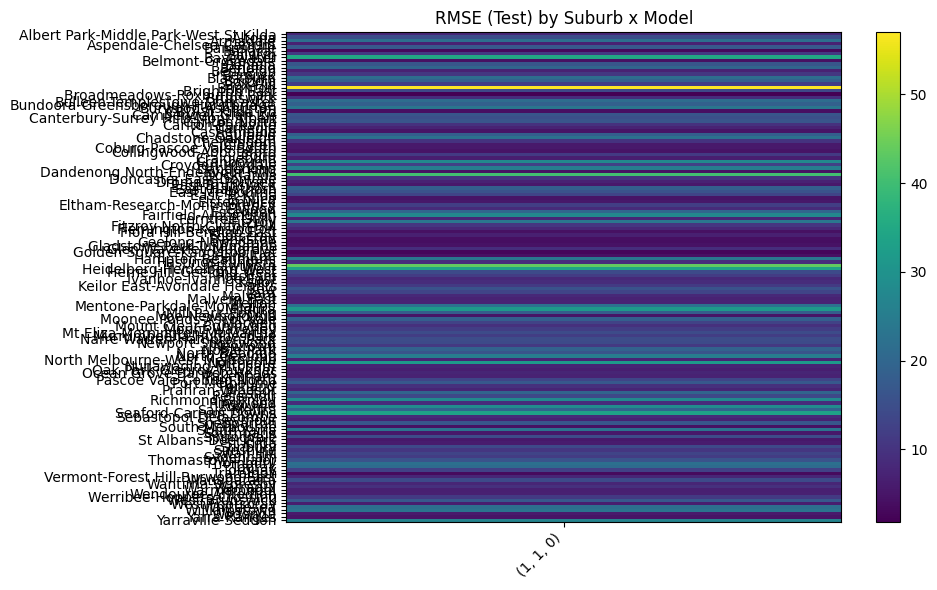

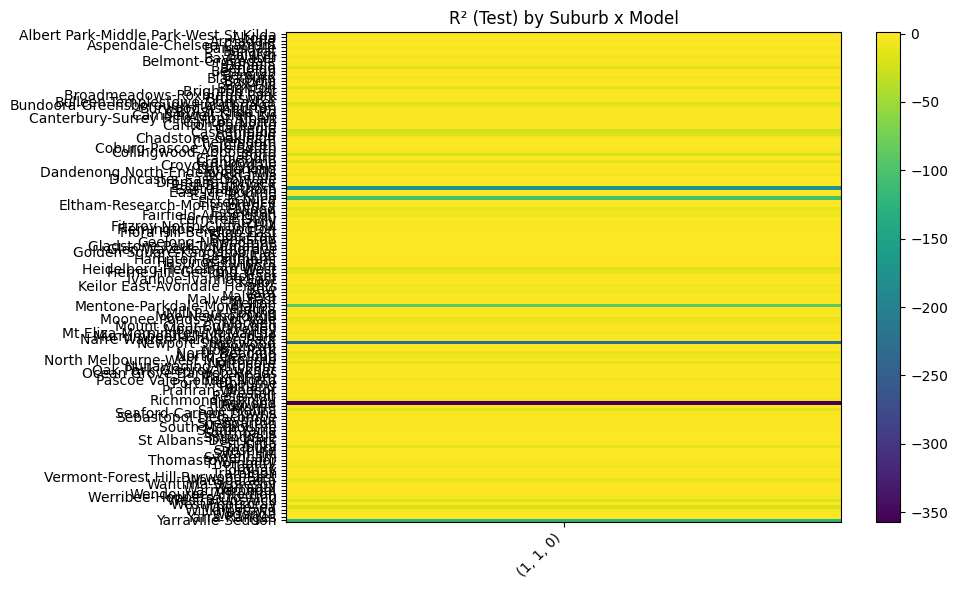

In [171]:
# ===============================
# EVALUATION MATRIX & SUMMARIES
# ===============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def build_eval_matrices(metrics_df):
    """
    Given the tall metrics_df (one row per suburb x model),
    return wide matrices for each metric and a 'best model per suburb' table.
    """
    if metrics_df is None or metrics_df.empty:
        print("metrics_df is empty.")
        return {}, pd.DataFrame()

    # Ensure model label exists
    if "model" not in metrics_df.columns:
        metrics_df = metrics_df.copy()
        metrics_df["model"] = metrics_df["Order"].astype(str)

    metric_names = ["RMSE_Test", "MAE_Test", "sMAPE_%", "WAPE_%", "R2_Test"]
    pivots = {}
    for m in metric_names:
        if m in metrics_df.columns:
            piv = (metrics_df
                   .pivot_table(index="Suburb", columns="model", values=m, aggfunc="mean")
                   .sort_index())
            pivots[m] = piv

    # Best model per suburb by RMSE (lower is better)
    if "RMSE_Test" in pivots:
        best_by_rmse = pivots["RMSE_Test"].idxmin(axis=1).to_frame("best_model_by_RMSE")
    else:
        best_by_rmse = pd.DataFrame(index=metrics_df["Suburb"].unique(),
                                    data={"best_model_by_RMSE": np.nan})

    return pivots, best_by_rmse

def print_portfolio_summaries(metrics_df):
    """
    Portfolio-level summaries across all suburbs/models: mean/median of key metrics.
    """
    if metrics_df is None or metrics_df.empty:
        print("metrics_df is empty.")
        return

    keep = ["MAE_Test","RMSE_Test","sMAPE_%","WAPE_%","R2_Test","AIC"]
    available = [c for c in keep if c in metrics_df.columns]
    summ = metrics_df[available].describe(percentiles=[0.25,0.5,0.75]).T
    print("\n=== Portfolio summary (all suburbs & models) ===")
    print(summ.round(3))

def choose_best_per_suburb(metrics_df, criterion="RMSE_Test"):
    """
    Return one row per suburb: the model (p,d,q) with the best (lowest) criterion.
    """
    if metrics_df is None or metrics_df.empty:
        return pd.DataFrame()
    if criterion not in metrics_df.columns:
        raise KeyError(f"{criterion} not in metrics_df columns")

    metrics_df = metrics_df.copy()
    metrics_df["model"] = metrics_df["Order"].astype(str)
    # lower is better for RMSE/MAE/sMAPE/WAPE; higher is better for R2
    ascending = True if criterion in ["RMSE_Test","MAE_Test","sMAPE_%","WAPE_%","AIC"] else False
    best = (metrics_df
            .sort_values(["Suburb", criterion], ascending=[True, ascending])
            .groupby("Suburb", as_index=False)
            .first()[["Suburb","Order","model",criterion,"AIC"]])
    return best

def plot_metric_heatmap(pivot_df, title="Metric heatmap", figsize=(10,6)):
    """
    Simple matplotlib heatmap for a wide pivot (Suburb x model).
    NaNs are shown as blanks.
    """
    if pivot_df is None or pivot_df.empty:
        print("Nothing to plot.")
        return

    Z = pivot_df.values.astype(float)
    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(Z, aspect='auto', interpolation='nearest')
    ax.set_xticks(np.arange(len(pivot_df.columns)))
    ax.set_yticks(np.arange(len(pivot_df.index)))
    ax.set_xticklabels(pivot_df.columns, rotation=45, ha='right')
    ax.set_yticklabels(pivot_df.index)
    ax.set_title(title)
    fig.colorbar(im, ax=ax)
    plt.tight_layout()
    plt.show()

# ===============================
# HOW TO RUN (after your metrics_df)
# ===============================
# metrics_df, r2_wide_df = run_arima4_by_suburb_noseason(...)

pivots, best_by_rmse = build_eval_matrices(metrics_df)
print_portfolio_summaries(metrics_df)

print("\n=== Best model per suburb by RMSE ===")
print(best_by_rmse.head(20))

# Plot heatmaps (pick any pivot):
if "RMSE_Test" in pivots:
    plot_metric_heatmap(pivots["RMSE_Test"], title="RMSE (Test) by Suburb x Model")
if "sMAPE_%" in pivots:
    plot_metric_heatmap(pivots["sMAPE_%"], title="sMAPE% (Test) by Suburb x Model")
if "R2_Test" in pivots:
    plot_metric_heatmap(pivots["R2_Test"], title="R² (Test) by Suburb x Model")



In [169]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def compare_plot_suburb_test(
    merged_df,
    suburb,
    split_date="2024-09-01",
    exog_cols=("ERP_quarterly", "Income_quarterly_med"),
    order=(1,1,0),
    figsize=(10,5),
    ci_alpha=0.2
):
    """
    Fit SARIMAX(endog=Median, exog=exog_cols) on TRAIN (< split_date),
    forecast TEST (>= split_date), return comparison DF and plot
    test actual vs test forecast with 95% CI.

    Returns: comparison DataFrame with columns:
        ['Suburb','date','Actual','Predicted','Error','AbsError','PctError']
    """

    # ---- slice suburb & prep quarterly freq ----
    g = merged_df.loc[merged_df["Suburb"] == suburb,
                      ["date","Median"] + list(exog_cols)].copy()
    if g.empty:
        print(f"No rows for suburb: {suburb}")
        return pd.DataFrame()

    g["date"] = pd.to_datetime(g["date"])
    g = g.set_index("date").asfreq("3MS").sort_index()

    # endog/exog
    missing = [c for c in exog_cols if c not in g.columns]
    if missing:
        print(f"Missing exog columns for {suburb}: {missing}")
        return pd.DataFrame()

    y = g["Median"].ffill().bfill()
    X = g[list(exog_cols)].ffill().bfill()

    # ---- split ----
    split_date = pd.Timestamp(split_date)
    y_train, y_test = y.loc[y.index < split_date],  y.loc[y.index >= split_date]
    X_train, X_test = X.loc[X.index < split_date],  X.loc[X.index >= split_date]

    if len(y_test) == 0:
        print(f"No test rows for {suburb} on/after {split_date.date()}.")
        return pd.DataFrame()

    # ---- fit & forecast ----
    mdl = sm.tsa.SARIMAX(
        endog=y_train, exog=X_train,
        order=order, seasonal_order=(0,0,0,0),
        trend="c", enforce_stationarity=False, enforce_invertibility=False
    )
    fit = mdl.fit(method="lbfgs", disp=False, maxiter=1000)

    fc = fit.get_forecast(steps=len(y_test), exog=X_test)
    y_pred = pd.Series(fc.predicted_mean.values, index=y_test.index)
    ci = fc.conf_int(alpha=0.05)  # 95% CI
    ci.index = y_test.index

    # ---- comparison table ----
    cmp = pd.DataFrame({
        "Suburb": suburb,
        "date": y_test.index,
        "Actual": y_test.values,
        "Predicted": y_pred.values
    })
    cmp["Error"]    = cmp["Predicted"] - cmp["Actual"]
    cmp["AbsError"] = cmp["Error"].abs()
    cmp["PctError"] = np.where(cmp["Actual"] != 0, cmp["Error"] / cmp["Actual"], np.nan)

    # quick metrics
    mae  = mean_absolute_error(cmp["Actual"], cmp["Predicted"])
    rmse = mean_squared_error(cmp["Actual"], cmp["Predicted"], squared=False)
    r2   = r2_score(cmp["Actual"], cmp["Predicted"]) if len(cmp) > 1 else np.nan
    print(f"{suburb} — Test MAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.3f}")

    # ---- plot test actual vs forecast ----
    plt.figure(figsize=figsize)
    plt.plot(y_test.index, y_test.values, label="Test (actual)", lw=1.8)
    plt.plot(y_pred.index, y_pred.values, label="Forecast", lw=2, linestyle="--")
    plt.fill_between(y_pred.index, ci.iloc[:,0], ci.iloc[:,1], alpha=ci_alpha, label="95% CI")
    plt.title(f"{suburb} — ARIMA{order} | Test actual vs forecast")
    plt.xlabel("Quarter")
    plt.ylabel("Median rent")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # also print the table so you can eyeball errors
    with pd.option_context("display.max_rows", None, "display.width", 120):
        print("\nTest window comparison (first 20 rows):")
        print(cmp.head(20).round(2).to_string(index=False))

    return cmp



In [124]:
compare_plot_suburb_test

<function __main__.compare_plot_suburb_test(merged_df, suburb, split_date='2024-09-01', exog_cols=('ERP_quarterly', 'Income_quarterly_med'), order=(1, 1, 0), figsize=(10, 5), ci_alpha=0.2)>

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Brunswick — Test MAE: 8.78 | RMSE: 9.08 | R²: -1.122


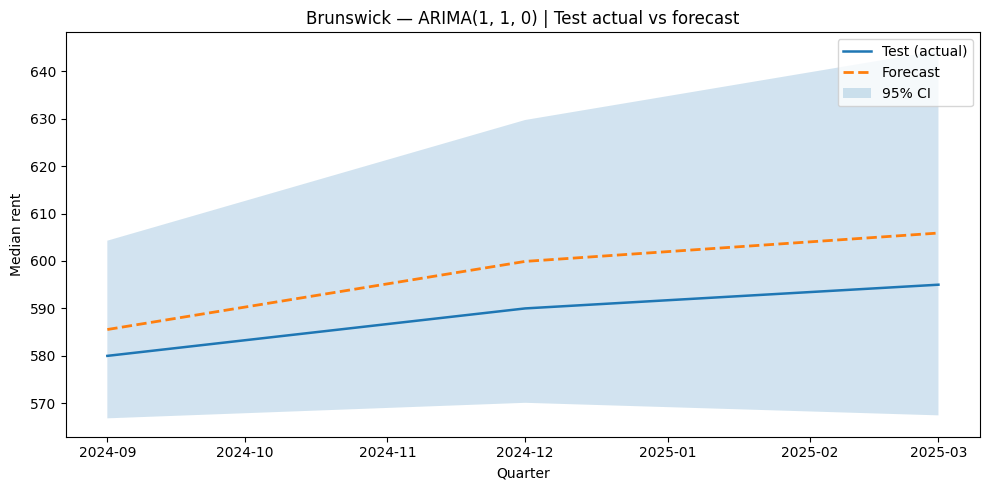


Test window comparison (first 20 rows):
   Suburb       date  Actual  Predicted  Error  AbsError  PctError
Brunswick 2024-09-01     580     585.55   5.55      5.55      0.01
Brunswick 2024-12-01     590     599.91   9.91      9.91      0.02
Brunswick 2025-03-01     595     605.89  10.89     10.89      0.02


In [170]:
# Pick a suburb and (optionally) the best order you found for it
sub = "Brunswick"            # <- change to any suburb name
best_order = (1,1,0)         # <- or pick from your metrics_df

cmp_df = compare_plot_suburb_test(
    merged_df,
    suburb=sub,
    split_date="2024-09-01",
    exog_cols=("ERP_quarterly","Income_quarterly_med"),
    order=best_order
)

# Save the table if you want
# cmp_df.to_csv(f"cmp_{sub.replace(' ','_')}.csv", index=False)



We can see that the best model is when (1, 1, 0)   -10.270683

In [33]:
df = pd.read_csv("/home/eeamanda/project-2-group-real-estate-industry-project-7-2025/Amanda-workspace/merged_df_new.csv")

In [172]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# ===============================
# Helpers
# ===============================
def _qfreq_and_fill(df, exog_cols):
    """Set to quarterly freq (3MS) and forward/back-fill endog+exog."""
    df = df.set_index("date").asfreq("3MS").sort_index()
    # fill
    df["Median"] = df["Median"].ffill().bfill()
    for c in exog_cols:
        if c in df.columns:
            df[c] = df[c].ffill().bfill()
    return df

def _metrics(y_true, y_pred):
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2   = r2_score(y_true, y_pred) if len(y_true) > 1 else np.nan
    return mae, rmse, r2

# ===============================
# Main runner (per suburb, two models)
# ===============================
def evaluate_suburbs_arima_sarimax(
    merged_df,
    split_date="2024-09-01",
    exog_cols=("ERP_quarterly", "Income_quarterly_med"),
    use_exog=True,
    order_sarimax=(1,1,1),
    seasonal_order=(0,1,1,4),  # set to (0,0,0,0) to disable seasonality
    arima_baseline_order=(4,1,3),
    log_target=True,
    min_train=12,
    min_test=2,
):
    """
    For each suburb:
      - Prepare quarterly series, fill gaps.
      - Split into train/test by date.
      - Fit SARIMAX with optional exog + seasonality (Model='SARIMAX')  [if use_exog=True or seasonal_order != (0,0,0,0)]
      - Fit plain ARIMA(p,d,q) baseline (Model='ARIMA_413')              [no exog, no seasonal]
      - Evaluate both on test; return metrics and predictions (wide).

    Returns:
      metrics_df: one row per suburb x model with MAE/RMSE/R2 and bookkeeping
      preds_df  : long table of test predictions (Suburb, date, Actual, Predicted, Model)
    """
    split_date = pd.Timestamp(split_date)

    all_metrics = []
    all_preds   = []

    for suburb, g in merged_df.groupby("Suburb"):
        g = g[["date", "Median"] + list(exog_cols)]
        if g.empty:
            continue

        g = g.copy()
        g["date"] = pd.to_datetime(g["date"])
        g = _qfreq_and_fill(g, exog_cols)

        # train/test split
        y      = g["Median"]
        X_full = g[list(exog_cols)] if use_exog else None

        y_tr, y_te = y.loc[y.index < split_date],  y.loc[y.index >= split_date]
        if X_full is not None:
            X_tr, X_te = X_full.loc[y_tr.index], X_full.loc[y_te.index]
        else:
            X_tr = X_te = None

        if len(y_tr) < min_train or len(y_te) < min_test:
            continue

        # ---------- LOG transform if requested ----------
        if log_target:
            y_tr_fit = np.log(y_tr.clip(lower=1.0))
            y_te_true = y_te.values  # keep original-level truth
        else:
            y_tr_fit = y_tr
            y_te_true = y_te.values

        # ========== Model 1: SARIMAX (exog + optional seasonality) ==========
        # Only run if exog requested OR seasonality enabled
        run_sarimax = (use_exog and X_tr is not None) or (seasonal_order != (0,0,0,0))
        if run_sarimax:
            try:
                mdl = sm.tsa.SARIMAX(
                    endog=y_tr_fit,
                    exog=X_tr if (use_exog and X_tr is not None) else None,
                    order=order_sarimax,
                    seasonal_order=seasonal_order,
                    trend="c",
                    enforce_stationarity=False,
                    enforce_invertibility=False,
                )
                fit = mdl.fit(method="lbfgs", disp=False, maxiter=1000)

                fc  = fit.get_forecast(steps=len(y_te), exog=X_te if (use_exog and X_te is not None) else None)
                y_pred_tr = pd.Series(fc.predicted_mean.values, index=y_te.index)

                # back-transform if needed
                y_pred = np.exp(y_pred_tr.values) if log_target else y_pred_tr.values
                mae, rmse, r2 = _metrics(y_te_true, y_pred)

                all_metrics.append({
                    "Suburb": suburb,
                    "Model": f"SARIMAX{order_sarimax}_x_{seasonal_order}" + ("+exog" if use_exog else ""),
                    "MAE_Test": mae, "RMSE_Test": rmse, "R2_Test": r2,
                    "Train_n": len(y_tr), "Test_n": len(y_te)
                })
                all_preds.append(pd.DataFrame({
                    "Suburb": suburb,
                    "date": y_te.index,
                    "Actual": y_te_true,
                    "Predicted": y_pred,
                    "Model": f"SARIMAX{order_sarimax}_x_{seasonal_order}" + ("+exog" if use_exog else ""),
                }))
            except Exception as e:
                all_metrics.append({
                    "Suburb": suburb,
                    "Model": f"SARIMAX{order_sarimax}_x_{seasonal_order} (+exog={use_exog})",
                    "MAE_Test": np.nan, "RMSE_Test": np.nan, "R2_Test": np.nan,
                    "Train_n": len(y_tr), "Test_n": len(y_te),
                    "Error": str(e)
                })

        # ========== Model 2: Plain ARIMA baseline (like your snippet) ==========
        try:
            # Fit on same *scale* as SARIMAX fit (log or level)
            y_tr_base = y_tr_fit if log_target else y_tr
            arima = ARIMA(y_tr_base, order=arima_baseline_order)  # no exog, no seasonal
            ar_fit = arima.fit()

            y_pred_base = ar_fit.forecast(steps=len(y_te))
            # back-transform if needed
            y_pred_base = np.exp(y_pred_base.values) if log_target else y_pred_base.values

            mae_b, rmse_b, r2_b = _metrics(y_te_true, y_pred_base)

            all_metrics.append({
                "Suburb": suburb,
                "Model": f"ARIMA{arima_baseline_order}",
                "MAE_Test": mae_b, "RMSE_Test": rmse_b, "R2_Test": r2_b,
                "Train_n": len(y_tr), "Test_n": len(y_te)
            })
            all_preds.append(pd.DataFrame({
                "Suburb": suburb,
                "date": y_te.index,
                "Actual": y_te_true,
                "Predicted": y_pred_base,
                "Model": f"ARIMA{arima_baseline_order}",
            }))
        except Exception as e:
            all_metrics.append({
                "Suburb": suburb,
                "Model": f"ARIMA{arima_baseline_order}",
                "MAE_Test": np.nan, "RMSE_Test": np.nan, "R2_Test": np.nan,
                "Train_n": len(y_tr), "Test_n": len(y_te),
                "Error": str(e)
            })

    metrics_df = pd.DataFrame(all_metrics)
    preds_df   = pd.concat(all_preds, ignore_index=True) if all_preds else pd.DataFrame()
    return metrics_df, preds_df


In [173]:
metrics_df, preds_df = evaluate_suburbs_arima_sarimax(
    merged_df,
    split_date="2024-09-01",
    exog_cols=("ERP_quarterly", "Income_quarterly_med"),
    use_exog=True,                       # turn off to ignore exog
    order_sarimax=(1,1,1),               # SARIMAX (p,d,q)
    seasonal_order=(0,1,1,4),            # quarterly seasonality (set to (0,0,0,0) to disable)
    arima_baseline_order=(4,1,3),        # <- your exact baseline
    log_target=True,                     # log rents, then back-transform for metrics
    min_train=12,
    min_test=2,
)

print(metrics_df.head())
print(preds_df.head())


/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use t

                                  Suburb  \
0  Albert Park-Middle Park-West St Kilda   
1  Albert Park-Middle Park-West St Kilda   
2                                 Altona   
3                                 Altona   
4                               Armadale   

                                  Model    MAE_Test   RMSE_Test      R2_Test  \
0  SARIMAX(1, 1, 1)_x_(0, 1, 1, 4)+exog  201.495841  276.822203 -7036.497827   
1                        ARIMA(4, 1, 3)    8.399291    9.568429    -7.408097   
2  SARIMAX(1, 1, 1)_x_(0, 1, 1, 4)+exog   62.858853   73.366730     0.000000   
3                        ARIMA(4, 1, 3)   10.545800   12.528078     0.000000   
4  SARIMAX(1, 1, 1)_x_(0, 1, 1, 4)+exog   52.341063   56.234644   -21.768813   

   Train_n  Test_n Error  
0       30       3   NaN  
1       30       3   NaN  
2       30       3   NaN  
3       30       3   NaN  
4       30       3   NaN  
                                  Suburb       date  Actual    Predicted  \
0  Albert Park-M

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [175]:
import numpy as np
import pandas as pd

def summarize_metrics(metrics_df):
    """
    Print overall & per-model averages for MAE/RMSE/R2.
    Includes:
      - simple mean & median
      - weighted mean by Test_n (if present)
      - share of positive R2
    Returns two DataFrames: overall_summary, by_model_summary
    """
    if metrics_df is None or metrics_df.empty:
        print("metrics_df is empty.")
        return pd.DataFrame(), pd.DataFrame()

    df = metrics_df.copy()
    keep = ["Model", "MAE_Test", "RMSE_Test", "R2_Test", "Train_n", "Test_n"]
    df = df[[c for c in keep if c in df.columns]].copy()

    # Helper: weighted mean by Test_n
    def wmean(series, weights):
        s = series.astype(float)
        w = weights.astype(float).clip(lower=0)
        num = np.nansum(s * w)
        den = np.nansum(w[~s.isna()])  # use weights where s is not NaN
        return np.nan if den == 0 else num / den

    # -------- Overall summary --------
    overall = {}
    for m in ["MAE_Test", "RMSE_Test", "R2_Test"]:
        if m in df.columns:
            overall[f"{m}_mean"]   = df[m].mean()
            overall[f"{m}_median"] = df[m].median()
            if "Test_n" in df.columns:
                overall[f"{m}_wmean"] = wmean(df[m], df["Test_n"])
    if "R2_Test" in df.columns:
        overall["R2_pos_share"] = (df["R2_Test"] > 0).mean()

    overall_summary = pd.DataFrame([overall]).T.rename(columns={0: "value"}).round(4)

    print("\n=== Overall metrics (all suburbs & models) ===")
    print(overall_summary)

    # -------- By-model summary --------
    by_model_rows = []
    for model, g in df.groupby("Model"):
        row = {"Model": model, "n_rows": len(g)}
        for m in ["MAE_Test", "RMSE_Test", "R2_Test"]:
            if m in g.columns:
                row[f"{m}_mean"]   = g[m].mean()
                row[f"{m}_median"] = g[m].median()
                if "Test_n" in g.columns:
                    row[f"{m}_wmean"] = wmean(g[m], g["Test_n"])
        if "R2_Test" in g.columns:
            row["R2_pos_share"] = (g["R2_Test"] > 0).mean()
        by_model_rows.append(row)

    by_model_summary = (
        pd.DataFrame(by_model_rows)
        .sort_values(["RMSE_Test_wmean","RMSE_Test_mean","MAE_Test_wmean","MAE_Test_mean"], ascending=True)
        .reset_index(drop=True)
        .round(4)
    )

    print("\n=== By-model metrics (averages across suburbs) ===")
    print(by_model_summary)

    return overall_summary, by_model_summary



In [176]:

overall_summary, by_model_summary = summarize_metrics(metrics_df)


=== Overall metrics (all suburbs & models) ===
                    value
MAE_Test_mean     23.7012
MAE_Test_median   15.6766
MAE_Test_wmean    23.7012
RMSE_Test_mean    27.1090
RMSE_Test_median  17.7007
RMSE_Test_wmean   27.1090
R2_Test_mean     -94.5649
R2_Test_median    -3.4314
R2_Test_wmean    -94.5649
R2_pos_share       0.1336

=== By-model metrics (averages across suburbs) ===
                                          Model  n_rows  MAE_Test_mean  \
0                                ARIMA(4, 1, 3)     146        15.9942   
1          SARIMAX(1, 1, 1)_x_(0, 1, 1, 4)+exog     145        31.4613   
2  SARIMAX(1, 1, 1)_x_(0, 1, 1, 4) (+exog=True)       1            NaN   

   MAE_Test_median  MAE_Test_wmean  RMSE_Test_mean  RMSE_Test_median  \
0          12.7742         15.9942         17.7231           13.7977   
1          19.8911         31.4613         36.5596           21.5482   
2              NaN             NaN             NaN               NaN   

   RMSE_Test_wmean  R2_Test_